In [9]:
import pandas as pd

data = pd.read_csv("flats_for_clustering.tsv",sep='\t')
print(data)

        cena  Powierzchnia w m2  Liczba pokoi  Liczba pięter w budynku  Piętro
0     290386                 46             2                      5.0  parter
1     450000                 59             2                      3.0       2
2     375000                 79             3                     16.0       5
3     400000                 63             3                      2.0       2
4     389285                 59             3                     13.0      12
...      ...                ...           ...                      ...     ...
4933  329900                 97             4                      4.0       4
4934  695303                 48             2                      4.0       3
4935  344152                 67             3                      2.0  parter
4936  650000                161             5                      1.0     NaN
4937  127900                 36             2                      2.0       2

[4938 rows x 5 columns]


In [10]:
print("Cena:\n",data["cena"].unique())
print("Powierzchnia w m2:\n",data["Powierzchnia w m2"].unique())
print("Liczba pokoi:\n",data["Liczba pokoi"].unique())
print("Liczba pięter w budynku:\n",data["Liczba pięter w budynku"].unique())
print("Piętro:\n",data["Piętro"].unique())

Cena:
 [290386 450000 375000 ... 329900 695303 127900]
Powierzchnia w m2:
 [   46    59    79    63    90    66    32    38    68    43   185    64
   165    71    73    51    70    48    42    33   203    88    41    31
    45    62    60   295    53    84   170    56    47   228    44    67
    49    37    87    36    55    57   118    65    30    28   230    54
    52    95    50    26   171   282    77    40   150   300    39   145
   370   140   225    29    61   135    27   270   177    85    92   132
    75   200    74   219   220    96   235    20   153   318   104    58
    72   117   189    81   111    35   280   141   195   120   250    97
   154   114    76   287    34   180   160   176   148    98   217    86
   260   198    78   183    80   163    82   100   156   320    89   103
   159   125   340   149   175   237   110   182   186   106   233   197
   136   162   157   240   211    83   196    69   102    91   108   130
   510   143  1200   178   226   190   151   138 

In [11]:
#Czyszczenie danych:
data= data[data["Piętro"]!="poddasze"]
data["Piętro"].replace("niski parter",0,inplace=True)
data["Piętro"].replace("parter",0,inplace=True)
print(data)

        cena  Powierzchnia w m2  Liczba pokoi  Liczba pięter w budynku Piętro
0     290386                 46             2                      5.0      0
1     450000                 59             2                      3.0      2
2     375000                 79             3                     16.0      5
3     400000                 63             3                      2.0      2
4     389285                 59             3                     13.0     12
...      ...                ...           ...                      ...    ...
4933  329900                 97             4                      4.0      4
4934  695303                 48             2                      4.0      3
4935  344152                 67             3                      2.0      0
4936  650000                161             5                      1.0    NaN
4937  127900                 36             2                      2.0      2

[4933 rows x 5 columns]


In [12]:
data.isnull().sum(axis = 0)

cena                         0
Powierzchnia w m2            0
Liczba pokoi                 0
Liczba pięter w budynku    150
Piętro                     579
dtype: int64

In [13]:
mean=round(data.loc[:, 'Liczba pięter w budynku'].mean(),3)
print("Średnia liczba pięter w budynku",mean)
data["Piętro"] = pd.to_numeric(data["Piętro"])
data.loc[data['Liczba pięter w budynku'].isna(), 'Liczba pięter w budynku']=mean
mean2=round(data.loc[:, 'Piętro'].mean(),2)
print("Średnie piętro",mean2)
data.loc[data['Piętro'].isna(), 'Piętro']=mean2

Średnia liczba pięter w budynku 5.317
Średnie piętro 2.72


In [14]:
#Dane po oczyszczeniu:
print(data)

        cena  Powierzchnia w m2  Liczba pokoi  Liczba pięter w budynku  Piętro
0     290386                 46             2                      5.0    0.00
1     450000                 59             2                      3.0    2.00
2     375000                 79             3                     16.0    5.00
3     400000                 63             3                      2.0    2.00
4     389285                 59             3                     13.0   12.00
...      ...                ...           ...                      ...     ...
4933  329900                 97             4                      4.0    4.00
4934  695303                 48             2                      4.0    3.00
4935  344152                 67             3                      2.0    0.00
4936  650000                161             5                      1.0    2.72
4937  127900                 36             2                      2.0    2.00

[4933 rows x 5 columns]


In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled=scaler.fit_transform(data)
print(scaled)

kmeans = KMeans(init="random", n_clusters=5)
label=kmeans.fit_predict(scaled)
print(label[0:20])

[[-3.99314600e-01 -1.68623641e-01 -6.78004380e-01 -8.83305034e-02
  -1.04496583e+00]
 [ 9.24521725e-02 -9.66620687e-02 -6.78004380e-01 -6.46409813e-01
  -2.75812951e-01]
 [-1.38620966e-01  1.40480426e-02  1.23672419e-01  2.98110570e+00
   8.77916363e-01]
 ...
 [-2.33662888e-01 -5.23780242e-02  1.23672419e-01 -9.25449468e-01
  -1.04496583e+00]
 [ 7.08647208e-01  4.67959499e-01  1.72702602e+00 -1.20448912e+00
   1.08208412e-03]
 [-8.99929932e-01 -2.23978697e-01 -6.78004380e-01 -9.25449468e-01
  -2.75812951e-01]]
[1 1 2 0 2 0 0 1 1 0 1 1 4 0 4 2 0 2 1 0]


c:\software\python3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: >

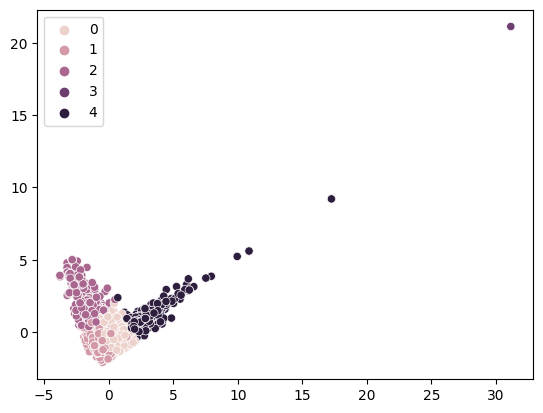

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pca = PCA(n_components=2)
transformed=pca.fit_transform(scaled)
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=kmeans.labels_)